In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


In [34]:
df=pd.read_csv("decision.csv")

In [35]:
df

,id,age,income,gender,marital status,buys
0,1,<21,h,m,s,n
1,2,<21,h,m,m,n
2,3,21-35,h,m,s,y
3,4,>35,m,m,s,y
4,5,>35,l,f,s,y
5,6,>35,l,f,m,n
6,7,21-35,l,f,m,y
7,8,<21,m,m,s,n
8,9,<21,l,f,m,y
9,10,>35,m,f,s,y


In [36]:
le=LabelEncoder()

In [37]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1].to_frame()

In [38]:
X

,id,age,income,gender,marital status
0,1,<21,h,m,s
1,2,<21,h,m,m
2,3,21-35,h,m,s
3,4,>35,m,m,s
4,5,>35,l,f,s
5,6,>35,l,f,m
6,7,21-35,l,f,m
7,8,<21,m,m,s
8,9,<21,l,f,m
9,10,>35,m,f,s


In [39]:
Y

,buys
0,n
1,n
2,y
3,y
4,y
5,n
6,y
7,n
8,y
9,y


In [40]:
X=X.apply(le.fit_transform)

In [41]:
X

,id,age,income,gender,marital status
0,0,1,0,1,1
1,1,1,0,1,0
2,2,0,0,1,1
3,3,2,2,1,1
4,4,2,1,0,1
5,5,2,1,0,0
6,6,0,1,0,0
7,7,1,2,1,1
8,8,1,1,0,0
9,9,2,2,0,1


In [42]:
X=X.iloc[:,1:5]

In [43]:
X

,age,income,gender,marital status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [44]:
model=DecisionTreeClassifier()

In [45]:
model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [46]:
model.score(X,Y)

1.0

In [47]:
X_in=pd.DataFrame([[1,1,0,0]])

In [48]:
X_in


,0,1,2,3
0,1,1,0,0


In [49]:
model.predict(X_in)

array(['y'], dtype=object)

In [50]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [56]:
dot_data = StringIO()

In [57]:
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

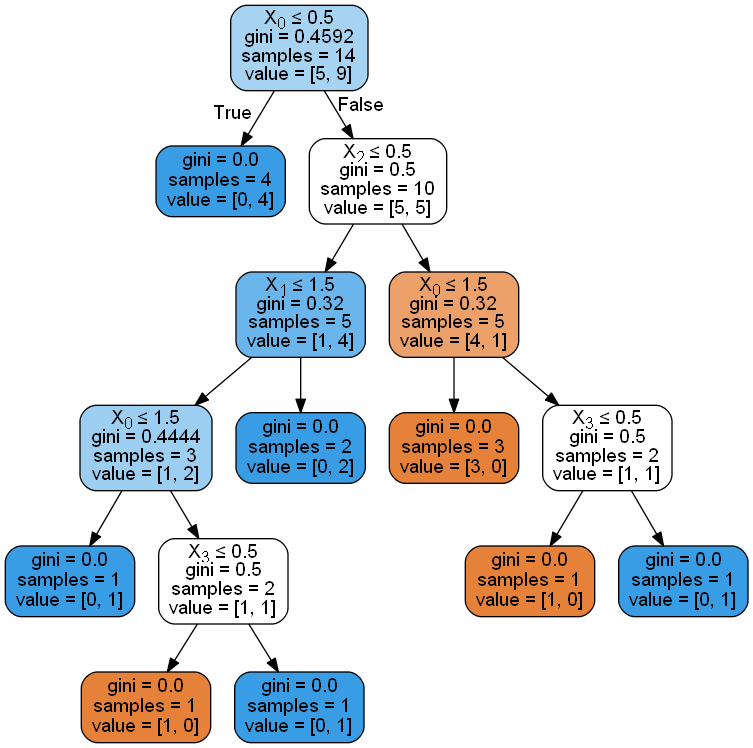

In [58]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())